# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [1]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Carson Turner"
__contact__   = "carson.turner@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [87]:
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

In [88]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation

lat = data.variables["latitude"][:]
lon= data.variables["longitude"][:]
time= data.variables["time"][:] # hours since 1900-01-01 00:00:0.0


startTime = datetime(1900,1,1,0,0)

dts = np.empty(len(time),dtype = datetime)
for index, t in enumerate(time):
    dts[index] = startTime + timedelta(hours =int(t))


tp= data.variables["tp"][:]*1000
p10u= data.variables["p10u"][:]
p10v= data.variables["p10v"][:]
msl= data.variables["msl"][:]/100




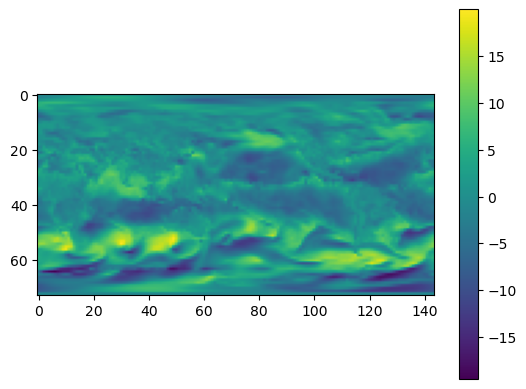

In [89]:
plt.imshow(p10u[26])
plt.colorbar()



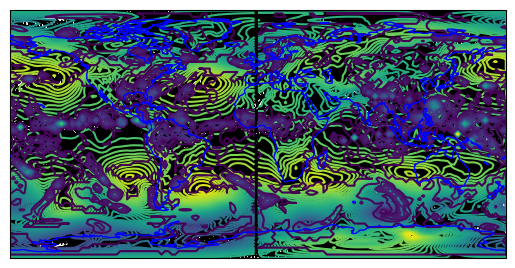

In [91]:

ax = plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(1,25,1)
plt.contour(lon, lat, msl[2],60, transform = ccrs.PlateCarree())
plt.barbs(lon[::5],lat, p10u[2][0:, p10v[2])
#ax.quiver(lon, lat, p10u[2], p10v[2], transform=ccrs.PlateCarree())


plt.contour (lon, lat, tp[3], 60, transform = ccrs.PlateCarree())
ax.coastlines(zorder = 4, color = "blue")



plt.show()


